In [43]:
import pandas as pd
import re
from scipy.stats import ttest_ind
import scipy.stats
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
df = pd.read_csv('../data/raw/Customer_Dataset_File.csv')
df.replace('#NULL!', np.NaN, inplace=True)

In [3]:
#What is the dimension of the data set - number of rows and columns
df.shape

(5000, 59)

In [4]:
#To get the names of all the variable columns in the data set
# print(df.columns)

In [5]:
# df.head().T

In [6]:
rows = len(df)
columns = len(df.columns)
values = rows*columns
non_na = df.count().sum()
na = values-non_na

print('Number of rows:', rows, '\n')
print('Number of columns:', columns, '\n')
print('Total cells:', values, '\n')
print('Total values:', non_na, '\n')
print('Missing values:', na, '\n')

Number of rows: 5000 

Number of columns: 59 

Total cells: 295000 

Total values: 294872 

Missing values: 128 



In [7]:
#Highlight what columns have missing values
[col for col in df.columns if df[col].isnull().any()]

['TownSize',
 'Gender',
 'JobCategory',
 'HouseholdSize',
 'NumberPets',
 'NumberCats',
 'NumberDogs',
 'NumberBirds',
 'HomeOwner',
 'CommuteTime']

In [8]:
#What are the difference data types in the data set?
# df.dtypes

In [9]:
# define module to create frequency distribution of variables
def freq_dist(df, col):
    df_fd = pd.DataFrame(data=df[col].value_counts())
    df_fd['pct_total'] = df_fd[col] / df_fd[col].sum()
    print(df_fd)
    
# define module to convert individual values in to buckets, creating corresponding labels; 
# outputs frequency distribution module above
def creat_bins(df, new_col, col, bins=[], labels=[]):
    df[new_col] = pd.cut(
    x=df[col], 
    bins=bins, 
    labels=labels)
    freq_dist(df, new_col)

In [10]:
#create frequency distribution of variables: HouseholdSize
freq_dist(df,'HouseholdSize')

     HouseholdSize  pct_total
1.0           2032   0.407051
2.0           1466   0.293670
3.0            552   0.110577
4.0            520   0.104167
5.0            287   0.057492
6.0             97   0.019431
7.0             29   0.005809
8.0              7   0.001402
9.0              2   0.000401


In [11]:
df_gend_carsown = df.groupby(by=['CarsOwned', 'Gender',]).agg({'Gender':'count'})
df_gend_carsown

Gender
CarsOwned Gender        
0         Female     242
          Male       253
1         Female     551
          Male       563
2         Female     800
          Male       796
3         Female     555
          Male       520
4         Female     238
          Male       239
5         Female      77
          Male        69
6         Female      25
          Male        26
7         Female       6
          Male         6
8         Male         1

In [12]:
creat_bins('EducationYears_group', 
           'EducationYears', 
           bins=[6, 10, 15, 19, 21, 23], 
           labels=['6-10 years of school', '11-15 years of school',
           '16-19 years of school', '20-21 years of school',
           '22-23 years of school'])

creat_bins('educ_years_rec', 
           'EducationYears', 
           bins=[6, 10, 15, 19, 21, 23], 
           labels=[1, 2, 3, 4, 5])

                       EducationYears_group  pct_total
11-15 years of school                  2465   0.493790
16-19 years of school                  1597   0.319912
6-10 years of school                    576   0.115385
20-21 years of school                   317   0.063502
22-23 years of school                    37   0.007412
   educ_years_rec  pct_total
2            2465   0.493790
3            1597   0.319912
1             576   0.115385
4             317   0.063502
5              37   0.007412


In [13]:
#create frequency distribution of variables: NumberPets
freq_dist(df,'NumberPets')

      NumberPets  pct_total
0.0         1529   0.306167
1.0          779   0.155987
2.0          584   0.116940
3.0          376   0.075290
5.0          298   0.059672
4.0          283   0.056668
6.0          255   0.051061
7.0          245   0.049059
8.0          178   0.035643
9.0          170   0.034041
10.0         115   0.023028
11.0          69   0.013817
12.0          50   0.010012
13.0          26   0.005206
14.0          13   0.002603
15.0          10   0.002002
16.0           9   0.001802
19.0           3   0.000601
18.0           1   0.000200
21.0           1   0.000200


In [14]:
#Create Diag_customer_data_file
diag = pd.DataFrame(df.describe(include=['float64','int64','object','datetime','category']).T)
diag_dtypes = pd.DataFrame(df.dtypes, columns=['types'])
diag = diag.join(diag_dtypes)
diag['count'] = pd.to_numeric(diag['count'])
diag['unique'] = pd.to_numeric(diag['unique'], errors='coerce')
diag['missing_count'] = 5000 - diag['count']
diag['missing_percent'] = diag['missing_count'] / 5000 *100
diag['unique_count'] = diag['unique']
diag['unique_rate'] = diag['unique_count'] / 5000
diag = diag[['types', 'missing_count', 'missing_percent', 'unique_count', 'unique_rate']]
diag

,types,missing_count,missing_percent,unique_count,unique_rate
CustomerID,object,0,0.00,5000.0,1.0000
Region,int64,0,0.00,NaN,NaN
TownSize,object,2,0.04,5.0,0.0010
Gender,object,33,0.66,2.0,0.0004
Age,int64,0,0.00,NaN,NaN
...,...,...,...,...,...
OwnsGameSystem,object,0,0.00,2.0,0.0004
OwnsFax,object,0,0.00,2.0,0.0004
NewsSubscriber,object,0,0.00,2.0,0.0004
EducationYears_group,category,8,0.16,5.0,0.0010


In [15]:
#Based on the output from the diagnose() work, here are some columns that have missing values:
diag.loc[diag['missing_count'] > 0]

,types,missing_count,missing_percent,unique_count,unique_rate
TownSize,object,2,0.04,5.0,0.0010
Gender,object,33,0.66,2.0,0.0004
JobCategory,object,15,0.30,6.0,0.0012
HouseholdSize,float64,8,0.16,NaN,NaN
NumberPets,float64,6,0.12,NaN,NaN
NumberCats,float64,7,0.14,NaN,NaN
NumberDogs,float64,8,0.16,NaN,NaN
NumberBirds,float64,34,0.68,NaN,NaN
HomeOwner,float64,13,0.26,NaN,NaN
CommuteTime,object,2,0.04,41.0,0.0082


In [16]:
#Convert values to numerics: Make note to review rows mistakenly labeled as 'object'
df['CommuteTime'] = pd.to_numeric(df['CommuteTime'], errors='coerce')
df['educ_years_rec'] = pd.to_numeric(df['educ_years_rec'], errors='coerce')
df['TownSize'] = pd.to_numeric(df['TownSize'], errors='coerce')
# df.TownSize.fillna(df.TownSize.mean(), inplace=True)
# df['TownSize'] = df['TownSize'].astype(int)
# df.LoanDefault.unique()

In [17]:
#Selecting only numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'int']
num_cols = df.select_dtypes(include=numerics)
print(num_cols.columns, '\n')
print(num_cols.shape)

Index(['Region', 'TownSize', 'Age', 'EducationYears', 'EmploymentLength',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'HouseholdSize',
       'NumberPets', 'NumberCats', 'NumberDogs', 'NumberBirds', 'HomeOwner',
       'CarsOwned', 'CommuteTime', 'CardTenure', 'CardItemsMonthly',
       'PhoneCoTenure', 'TVWatchingHours', 'educ_years_rec'],
      dtype='object') 

(5000, 21)


In [18]:
#Replacing missing values with means: TownSize
# df['TownSize'] = pd.to_numeric(df['TownSize'], errors='coerce')
# df.TownSize.fillna(df.TownSize.mean(), inplace=True)
# df['TownSize'] = df['TownSize'].astype(int)
# df.TownSize.unique()

#Replacing missing values with means: HouseholdSize
df.HouseholdSize.fillna(df.HouseholdSize.mean(), inplace=True)
# df['HouseholdSize'] = df['HouseholdSize'].astype(int)
freq_dist(df, 'HouseholdSize')

          HouseholdSize  pct_total
1.000000           2032     0.4064
2.000000           1466     0.2932
3.000000            552     0.1104
4.000000            520     0.1040
5.000000            287     0.0574
6.000000             97     0.0194
7.000000             29     0.0058
2.202324              8     0.0016
8.000000              7     0.0014
9.000000              2     0.0004


In [19]:
freq_dist(df, 'LoanDefault')

     LoanDefault  pct_total
No          3829     0.7658
Yes         1171     0.2342


In [20]:
freq_dist(df, 'HomeOwner')

     HomeOwner  pct_total
1.0       3140   0.629637
0.0       1847   0.370363


In [21]:
#Replacing missing values with means: NumberPets, NumberCats, NumberDogs, NumberBirds
df.NumberPets.fillna(df.NumberPets.mean(), inplace=True)
print(freq_dist(df,'NumberPets'), '\n')
df.NumberCats.fillna(df.NumberCats.mean(), inplace=True)
print(freq_dist(df,'NumberCats'), '\n')
df.NumberDogs.fillna(df.NumberDogs.mean(), inplace=True)
print(freq_dist(df,'NumberDogs'), '\n')
df.NumberBirds.fillna(df.NumberBirds.mean(), inplace=True)
print(freq_dist(df,'NumberBirds'), '\n')

          NumberPets  pct_total
0.00000         1529     0.3058
1.00000          779     0.1558
2.00000          584     0.1168
3.00000          376     0.0752
5.00000          298     0.0596
4.00000          283     0.0566
6.00000          255     0.0510
7.00000          245     0.0490
8.00000          178     0.0356
9.00000          170     0.0340
10.00000         115     0.0230
11.00000          69     0.0138
12.00000          50     0.0100
13.00000          26     0.0052
14.00000          13     0.0026
15.00000          10     0.0020
16.00000           9     0.0018
3.06668            6     0.0012
19.00000           3     0.0006
18.00000           1     0.0002
21.00000           1     0.0002
None 

        NumberCats  pct_total
0.0000        3408     0.6816
1.0000         922     0.1844
2.0000         463     0.0926
3.0000         159     0.0318
4.0000          34     0.0068
0.5003           7     0.0014
5.0000           5     0.0010
6.0000           2     0.0004
None 

          Nu

In [22]:
df.DebtToIncomeRatio.mean()

9.954160000000028

In [23]:
#HHIncome has a $ sign and a comma and therefore needs to be converted to a numeric vector
#Create a new variable 
df['HHIncome_2'] = df['HHIncome'].str.replace(',', '')
df['HHIncome_2'] = df['HHIncome_2'].str.replace('$', '')
df['HHIncome_2'] = df['HHIncome_2'].str.replace(' ', '')
df['HHIncome_2'] = df['HHIncome_2'].astype(float)
df['HHIncome_2'] = df['HHIncome_2'].replace('.0', '')
df['HHIncome2'] = df['HHIncome_2'].astype(int)

print(df.HHIncome_2.dtypes, '\n')

print('HHIncome_2 mean:',df.HHIncome_2.mean(), '\n')

freq_dist(df, 'HHIncome_2')


float64 

HHIncome_2 mean: 54759.6 

          HHIncome_2  pct_total
22000.0          112     0.0224
29000.0          109     0.0218
25000.0          108     0.0216
30000.0          102     0.0204
20000.0          102     0.0204
...              ...        ...
409000.0           1     0.0002
360000.0           1     0.0002
227000.0           1     0.0002
327000.0           1     0.0002
188000.0           1     0.0002

[266 rows x 2 columns]


In [24]:
#Recode HHIncome into a 6 level variable

creat_bins('HHIncome_rec', 
           'HHIncome_2', 
           bins=[0, 24000, 50000, 75000, 100000, 150001, 10000000], 
           labels=[1, 2, 3, 4, 5, 6])


   HHIncome_rec  pct_total
2          1835     0.3670
1          1330     0.2660
3           818     0.1636
4           436     0.0872
5           345     0.0690
6           236     0.0472


In [25]:
df.DebtToIncomeRatio.replace(np.NaN,0, inplace=True)
print(freq_dist(df,'DebtToIncomeRatio'))
#Displays only the highest debt to income ratios > 20
df_debt_inc_above_10 = df[(df.DebtToIncomeRatio > 20)]
print(freq_dist(df_debt_inc_above_10,'DebtToIncomeRatio'))

      DebtToIncomeRatio  pct_total
7.0                  48     0.0096
4.1                  46     0.0092
6.9                  46     0.0092
5.4                  45     0.0090
6.6                  42     0.0084
...                 ...        ...
26.9                  1     0.0002
33.3                  1     0.0002
31.6                  1     0.0002
30.7                  1     0.0002
36.4                  1     0.0002

[325 rows x 2 columns]
None
      DebtToIncomeRatio  pct_total
22.1                  9   0.023136
21.0                  9   0.023136
20.4                  9   0.023136
21.3                  9   0.023136
20.9                  9   0.023136
...                 ...        ...
34.1                  1   0.002571
38.2                  1   0.002571
24.0                  1   0.002571
30.0                  1   0.002571
32.7                  1   0.002571

[124 rows x 2 columns]
None


In [26]:
freq_dist(df,'LoanDefault')
df['LoanDefault_num'] = df.LoanDefault.replace(['No', 'Yes'], [1, 2])
freq_dist(df,'LoanDefault_num')

     LoanDefault  pct_total
No          3829     0.7658
Yes         1171     0.2342
   LoanDefault_num  pct_total
1             3829     0.7658
2             1171     0.2342


In [27]:
# df_Loandef_Debttoincome = pd.DataFrame(df['LoanDefault'].value_counts())
# df_Loandef_Debttoincome['pct_total'] = df_Loandef_Debttoincome['LoanDefault'] / df_Loandef_Debttoincome['LoanDefault'].sum()
# df_Loandef_Debttoincome = df_Loandef_Debttoincome.join()

In [28]:
df.HomeOwner.replace(np.NaN,0, inplace=True)
freq_dist(df,'HomeOwner')

     HomeOwner  pct_total
1.0       3140      0.628
0.0       1860      0.372


In [29]:
df.Gender.value_counts(dropna=False)

Female    2494
Male      2473
NaN         33
Name: Gender, dtype: int64

In [30]:
#Recoding the missing values of Gender to Female
#Convert all missing values for gender to female - arbitrary decision
df['Gender'] = df.Gender.replace(np.NaN,'Female')
df['Gender_num'] = df.Gender.replace(['Male', 'Female'], [2, 1])
freq_dist(df,'Gender_num')

   Gender_num  pct_total
1        2527     0.5054
2        2473     0.4946


In [31]:
#Variables for conducting  a segmentation with K Mean
# EducationYears
# EmploymentLength
# HHIncome_rec
# DebtToIncomeRatio
# LoanDefault_num
# HouseholdSize
# HomeOwner
# CardTenure
# Gender_num

#Creating a new debt to income ratio variable by multiplying by 10 to facilitate 
#bucketing since the right hand side vector must match the left hand side vector

In [32]:
df['DebtToIncomeRatio_2'] = df['DebtToIncomeRatio']*10

In [33]:
#Recode DebtToIncomeRatio_2 into a 7 level variable: DebtToIncomeRatio_2

creat_bins('DebtToIncomeRatio_rec', 
           'DebtToIncomeRatio_2', 
           bins=[0.0, 20, 40, 60, 80, 100, 130, 1000000], 
           labels=[1, 2, 3, 4, 5, 6, 7])

df.DebtToIncomeRatio_rec.replace(np.NaN,1, inplace=True)
freq_dist(df, 'DebtToIncomeRatio_rec')

   DebtToIncomeRatio_rec  pct_total
7                   1343   0.268654
6                    780   0.156031
3                    727   0.145429
4                    690   0.138028
5                    602   0.120424
2                    570   0.114023
1                    287   0.057411
   DebtToIncomeRatio_rec  pct_total
7                   1343     0.2686
6                    780     0.1560
3                    727     0.1454
4                    690     0.1380
5                    602     0.1204
2                    570     0.1140
1                    288     0.0576


In [34]:
#Recode DebtToIncomeRatio into a 7 level variable: DebtToIncomeRatio_rec3

creat_bins('DebtToIncomeRatio_rec3', 
           'DebtToIncomeRatio', 
           bins=[0.0, 2.09, 4.09, 6.09, 8.09, 10.09, 13.0, 1000000], 
           labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])

df.DebtToIncomeRatio_rec3.replace(np.NaN,1, inplace=True)
freq_dist(df, 'DebtToIncomeRatio_rec3')

     DebtToIncomeRatio_rec3  pct_total
7.0                    1343   0.268654
6.0                     780   0.156031
3.0                     727   0.145429
4.0                     690   0.138028
5.0                     602   0.120424
2.0                     570   0.114023
1.0                     287   0.057411
     DebtToIncomeRatio_rec3  pct_total
7.0                    1343     0.2686
6.0                     780     0.1560
3.0                     727     0.1454
4.0                     690     0.1380
5.0                     602     0.1204
2.0                     570     0.1140
1.0                     288     0.0576


In [35]:
#Recode DebtToIncomeRatio_2 into a 7 level variable: DebtToIncomeRatio_2

creat_bins('DebtToIncomeRatio_rec2', 
           'DebtToIncomeRatio_2', 
           bins=[0, 20, 40, 60, 80, 100, 130, 1000000], 
           labels=['A','B','C','D','E','F','G'])

df.DebtToIncomeRatio_rec2.replace(np.NaN,'A', inplace=True)
freq_dist(df, 'DebtToIncomeRatio_rec2')

   DebtToIncomeRatio_rec2  pct_total
G                    1343   0.268654
F                     780   0.156031
C                     727   0.145429
D                     690   0.138028
E                     602   0.120424
B                     570   0.114023
A                     287   0.057411
   DebtToIncomeRatio_rec2  pct_total
G                    1343     0.2686
F                     780     0.1560
C                     727     0.1454
D                     690     0.1380
E                     602     0.1204
B                     570     0.1140
A                     288     0.0576


In [36]:
#Highlight what columns have missing values
[col for col in df.columns if df[col].isnull().any()]

['TownSize',
 'JobCategory',
 'CommuteTime',
 'EducationYears_group',
 'educ_years_rec']

In [37]:
df_num = df[["EducationYears","EmploymentLength","HHIncome_2","DebtToIncomeRatio",
             "LoanDefault_num","HouseholdSize","HomeOwner","CardTenure","Gender_num"]]

#Converts all columns to numeric
cols= df_num.columns
df_num[cols] = df_num[cols].apply(pd.to_numeric, errors='coerce')

#Selecting only numeric columns to confirm above
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'int']
num_cols = df_num.select_dtypes(include=numerics)
print(num_cols.columns, '\n')
print(num_cols.shape)

Index(['EducationYears', 'EmploymentLength', 'HHIncome_2', 'DebtToIncomeRatio',
       'LoanDefault_num', 'HouseholdSize', 'HomeOwner', 'CardTenure',
       'Gender_num'],
      dtype='object') 

(5000, 9)


C:\Users\mdpur\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
df_num

,EducationYears,EmploymentLength,HHIncome_2,DebtToIncomeRatio,LoanDefault_num,HouseholdSize,HomeOwner,CardTenure,Gender_num
0,15,0,31000.0,11.1,2,3.0,0.0,2,1
1,17,0,15000.0,18.6,2,2.0,1.0,4,2
2,14,16,35000.0,9.9,1,3.0,1.0,35,1
3,16,0,20000.0,5.7,2,5.0,1.0,5,2
4,16,1,23000.0,1.7,1,4.0,0.0,8,2
...,...,...,...,...,...,...,...,...,...
4995,10,24,196000.0,8.0,1,1.0,1.0,35,2
4996,14,6,83000.0,15.0,2,1.0,1.0,15,2
4997,17,24,108000.0,10.8,1,1.0,1.0,40,2
4998,19,3,189000.0,10.8,2,4.0,1.0,22,2


In [39]:
pd.pivot_table(df_num, index=['Gender_num'], aggfunc=np.average, margins=True)

,CardTenure,DebtToIncomeRatio,EducationYears,EmploymentLength,HHIncome_2,HomeOwner,HouseholdSize,LoanDefault_num
Gender_num,,,,,,,,
1,16.406806,10.004986,14.540958,9.614563,54144.835774,0.630392,2.248756,1.233478
2,16.910230,9.902224,14.545087,9.848767,55387.788112,0.625556,2.154877,1.234937
All,16.655800,9.954160,14.543000,9.730400,54759.600000,0.628000,2.202324,1.234200


In [40]:
# df_size_owner = df_num[['HouseholdSize','HomeOwner']]
# df_size_owner.set_index('HouseholdSize', inplace=True)
# df_size_owner = append_one_hot(df_size_owner, 'HomeOwner')
# df_size_owner

In [41]:
df_size_owner = pd.pivot_table(df_num, index=['HouseholdSize'], aggfunc=np.average, margins=True)
df_size_owner['HomeOwner']

HouseholdSize
1.0                  0.566437
2.0                  0.636426
2.202323717948718    0.625000
3.0                  0.661232
4.0                  0.723077
5.0                  0.752613
6.0                  0.639175
7.0                  0.793103
8.0                  1.000000
9.0                  1.000000
All                  0.628000
Name: HomeOwner, dtype: float64

In [42]:
df_num

,EducationYears,EmploymentLength,HHIncome_2,DebtToIncomeRatio,LoanDefault_num,HouseholdSize,HomeOwner,CardTenure,Gender_num
0,15,0,31000.0,11.1,2,3.0,0.0,2,1
1,17,0,15000.0,18.6,2,2.0,1.0,4,2
2,14,16,35000.0,9.9,1,3.0,1.0,35,1
3,16,0,20000.0,5.7,2,5.0,1.0,5,2
4,16,1,23000.0,1.7,1,4.0,0.0,8,2
...,...,...,...,...,...,...,...,...,...
4995,10,24,196000.0,8.0,1,1.0,1.0,35,2
4996,14,6,83000.0,15.0,2,1.0,1.0,15,2
4997,17,24,108000.0,10.8,1,1.0,1.0,40,2
4998,19,3,189000.0,10.8,2,4.0,1.0,22,2


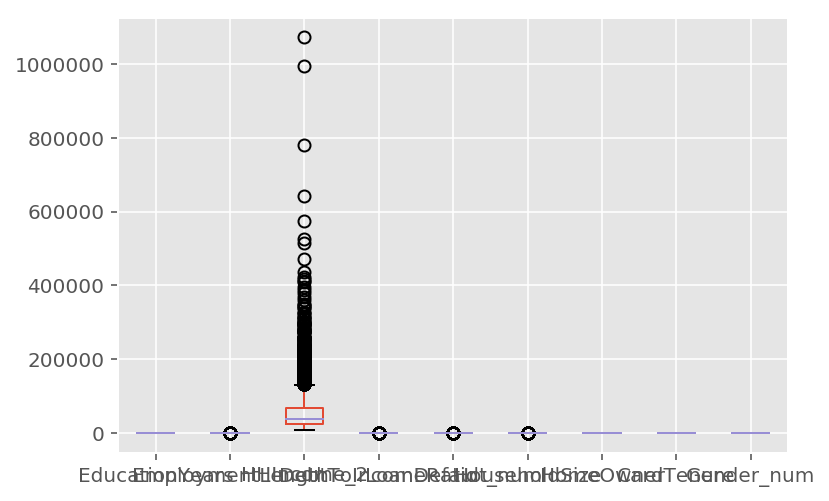

In [45]:
df_num_plot = df_num.boxplot()
df_num_plot

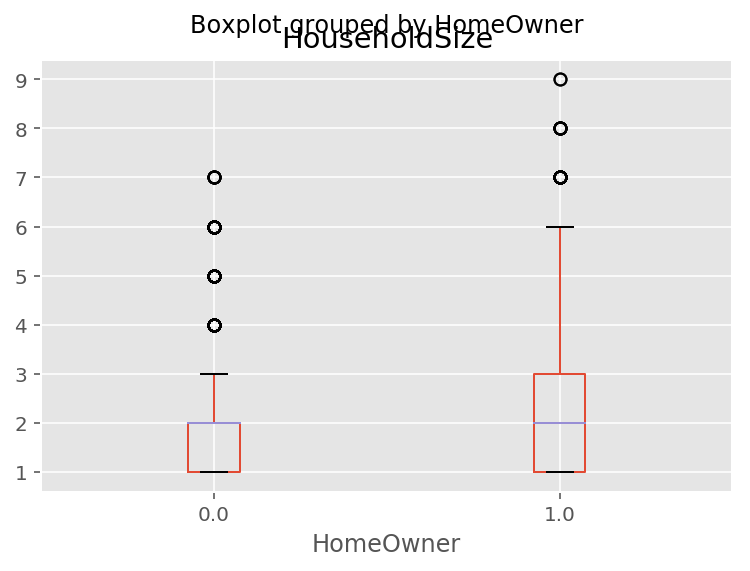

In [48]:
df_num.boxplot(by='JobCategory', column='HouseholdSize')

In [95]:
scipy.stats.ttest_rel(df_num['HomeOwner'], df_num['Gender_num'])

Ttest_relResult(statistic=-87.8901356244254, pvalue=0.0)

In [52]:
df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber', 'EducationYears_gr

In [56]:
df['DataLastMonth'].value_counts(dropna=False)

 $-         3656
 $34.30        9
 $27.95        7
 $32.20        7
 $22.95        7
            ... 
 $96.30        1
 $43.35        1
 $64.85        1
 $27.65        1
 $86.30        1
Name: DataLastMonth, Length: 746, dtype: int64